# Feature Engineering

The act of choosing, altering, and transforming raw data into features that may be utilised in supervised learning is known as feature engineering. It may be necessary to build and train better features in order for machine learning to perform well on new tasks. A "feature" is any measurable input that can be used in a predictive model, such as the colour of an object or the sound of someone's voice, as you may know. In simple terms, feature engineering is the process of transforming raw observations into desired characteristics through statistical or machine learning methods.

* **Feature Creation:** Feature creation entails the creation of new variables that will be most useful to our model. This could entail adding or eliminating features. 
* **Feature Transformation:** Essentially a function that converts features from one representation to the next. The idea is to plot and visualise data so that if something doesn't add up with the new features, we can reduce the number of features utilised, speed up training, or improve the accuracy of a model. (This was done in the EDA section,  we are super efficient!)
* **Benchmarking:** A Benchmark Model is the most user-friendly, dependable, clear, and interpretable model you can use to compare your own performance against. Running test datasets to see if your new machine learning model outperforms a recognised benchmark is a smart idea. These benchmarks are frequently used to compare the performance of various machine learning models such as neural networks and support vector machines, linear and non-linear classifiers, and techniques such as bagging and boosting.  We will be using LightGBM, Linear Regression, Quantile Regression and PCA to measure and benchmark performance. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc_train_data = pd.read_parquet("scale_encoded_train.parquet")

In [3]:
sc_train_data.head()

encode__State_Factor_State_10  encode__State_Factor_State_11  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   encode__State_Factor_State_2  encode__State_Factor_State_4  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   encode__State_Factor_State_6  encode__State_Factor_State_8  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   encode__facility_type_Lodging_Hotel  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   encode__facility_type_Multifamily_Uncategorized  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   encode__facility_type_Office_Uncategorized  encode__facility_type_Other  \
0                                           0                            1   
1                                           0                            1   
2                                           0                            1   
3                                           0                            0   
4                                           0                            1   

   ...  scale__days_below_0F  scale__days_above_80F  scale__days_above_90F  \
0  ...             -0.302936              -2.717656              -1.284612   
1  ...             -0.302936              -2.717656              -1.284612   
2  ...             -0.302936              -2.717656              -1.284612   
3  ...             -0.302936              -2.717656              -1.284612   
4  ...             -0.302936              -2.717656              -1.284612   

   scale__days_above_100F  scale__days_above_110F  \
0               -0.124112               -0.017181   
1               -0.124112               -0.017181   
2               -0.124112               -0.017181   
3               -0.124112               -0.017181   
4               -0.124112               -0.017181   

   scale__direction_max_wind_speed  scale__direction_peak_wind_speed  \
0                        -0.317352                         -0.299344   
1                        -0.317352                         -0.299344   
2                        -0.317352                         -0.299344   
3                        -0.317352                         -0.299344   
4                        -0.317352                         -0.299344   

   scale__max_wind_speed  scale__days_with_fog  scale__site_eui  
0              -0.314077              0.257072         2.851221  
1              -0.314077             -3.281746        -0.962742  
2              -0.314077             -3.281746        -0.993753  
3              -0.314077             -3.281746        -0.586692  
4              -0.314077              0.257072        -1.350704  

[5 rows x 70 columns]

In [6]:
cols = sc_train_data.columns.tolist()

## Variance Inflation Factor(VIF)

In a multivariate regression model, multicollinearity occurs when two or more independent variables have a significant correlation between them. We may have trouble discriminating between individual influences on the dependent variable when some traits are highly associated. Various strategies can be used to detect multicollinearity, one of which is the Variance Inflation Factor (VIF).

We select each feature and regress it against all other features using the VIF approach. The factor is calculated as follows for each regression:

`VIF = 1/1-R^2`

As we can see from the calculation, the higher the R-squared value, the higher the VIF. As a result, a higher VIF indicates a higher association. This corresponds to the fact that a higher R-squared value indicates greater collinearity.

* There is no association between a given explanatory variable and any other explanatory variables in the model if the value is 1.
* A number between 1 and 5 shows that there is substantial correlation between a specific explanatory variable and other explanatory variables in the model, but it is usually not severe enough to warrant attention.
* A score of more than 5 indicates that a specific explanatory variable and other explanatory variables in the model have a potentially severe connection. The coefficient estimates and p-values in the regression output are most likely erroneous in this circumstance.

Read more about VIF [here.](https://www.statisticshowto.com/variance-inflation-factor/)

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# select what columns (if not all the dataset)
X = sc_train_data[cols]
  
# create a VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                             feature         VIF
0      encode__State_Factor_State_10    1.695621
1      encode__State_Factor_State_11  589.851636
2       encode__State_Factor_State_2  287.422737
3       encode__State_Factor_State_4  273.284402
4       encode__State_Factor_State_6   92.759500
..                               ...         ...
65   scale__direction_max_wind_speed  107.927985
66  scale__direction_peak_wind_speed   13.240122
67             scale__max_wind_speed   68.665430
68              scale__days_with_fog    2.087651
69                   scale__site_eui    1.224001

[70 rows x 2 columns]


In [8]:
vif_data.sort_values("VIF")

feature            VIF
12                    scale__year_built       1.085568
11                    scale__floor_area       1.141130
13            scale__energy_star_rating       1.216646
69                      scale__site_eui       1.224001
6   encode__facility_type_Lodging_Hotel       1.667957
..                                  ...            ...
16              scale__january_avg_temp   13094.053587
19             scale__february_avg_temp   14006.566651
51           scale__cooling_degree_days   17935.419796
52           scale__heating_degree_days   80164.210981
56                      scale__avg_temp  180309.924759

[70 rows x 2 columns]

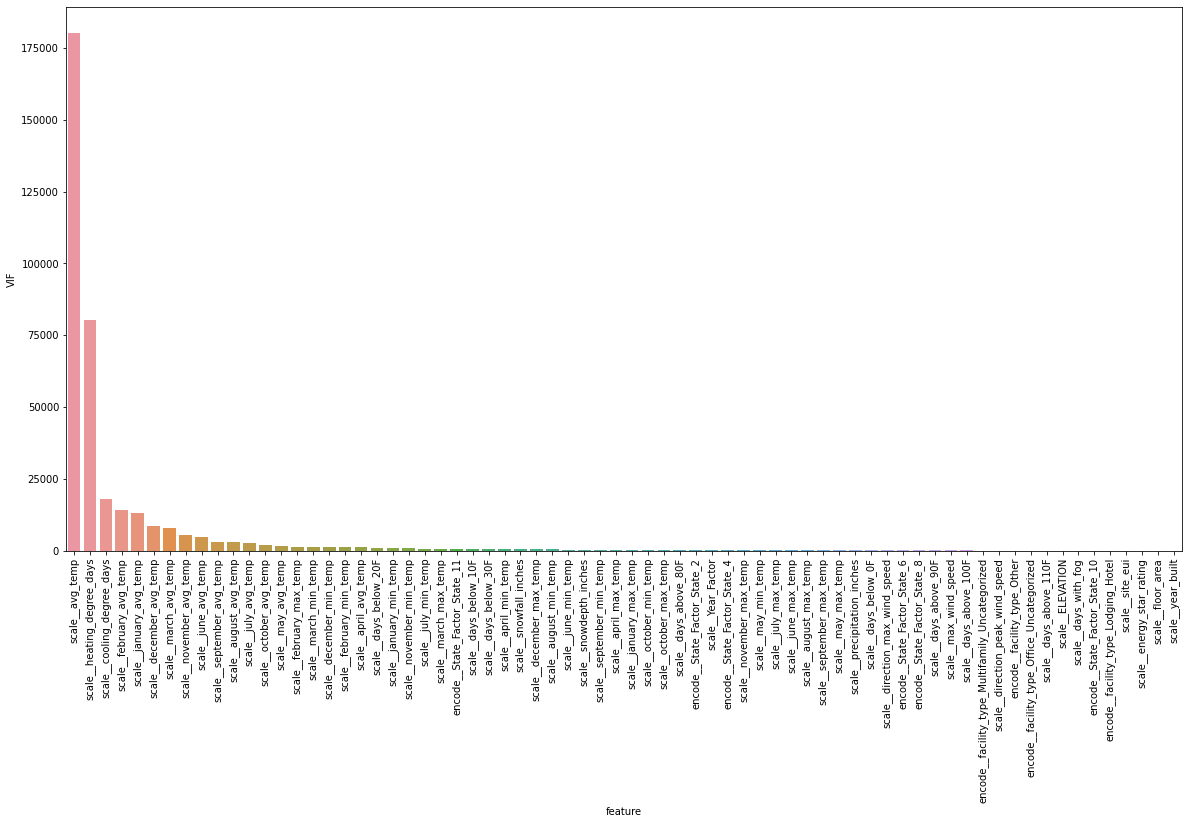

In [9]:
# visualise the results
plt.figure(figsize=(20,10))
ax = sns.barplot(x="feature", y="VIF", data=vif_data, 
                 order=vif_data.sort_values("VIF", ascending = False).feature)
plt.xticks(rotation="vertical")
plt.show()

As we can see there are some features which have a shocking high VIF - how should we deal with them?  Shall we drop the obscenely large ones? 

## Feature Creation

Features created from insight drawn from EDA - re-run the VIF to check if the features are actually good for the model. 

Ideas so far: 
* Combine monthly average temps into seasonal columns. 

## Feature Selection & Importance

Feature selection is a technique for reducing the number of features in a model and thereby lowering its computational complexity. Feature selection is frequently effective in overcoming the problem of overfitting. It assists us in discovering the minimal collection of information required to accurately predict the target variable. If a feature adds little or no benefit to the predictive power, why add them and increase the complexity?

Examining the model's coefficients is perhaps the simplest technique to analyse feature importances. Both linear and logistic regression, for example, are based on an equation in which each input value is assigned a coefficient (importance).

Simply said, if a given coefficient is a significant (negative or positive) value, it has an impact on the forecast. If the coefficient is zero, on the other hand, it has no bearing on the forecast.

### Prepare the Data

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = sc_train_data.drop("scale__site_eui", axis=1)
y = sc_train_data["scale__site_eui"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

### Light Gradient Boosting Machine (LightGBM)
LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

Faster training speed and higher efficiency.
* Lower memory usage.
* Better accuracy.
* Support of parallel, distributed, and GPU learning.
* Capable of handling large-scale data.

Benefiting from these advantages, LightGBM is being widely-used in many winning solutions of machine learning competitions. 

Read more about LightGBM [here.](https://www.analyticssteps.com/blogs/what-light-gbm-algorithm-how-use-it) 

In [11]:
import lightgbm

gbm = lightgbm.LGBMRegressor()
gbm.fit(X_train, y_train)

LGBMRegressor()

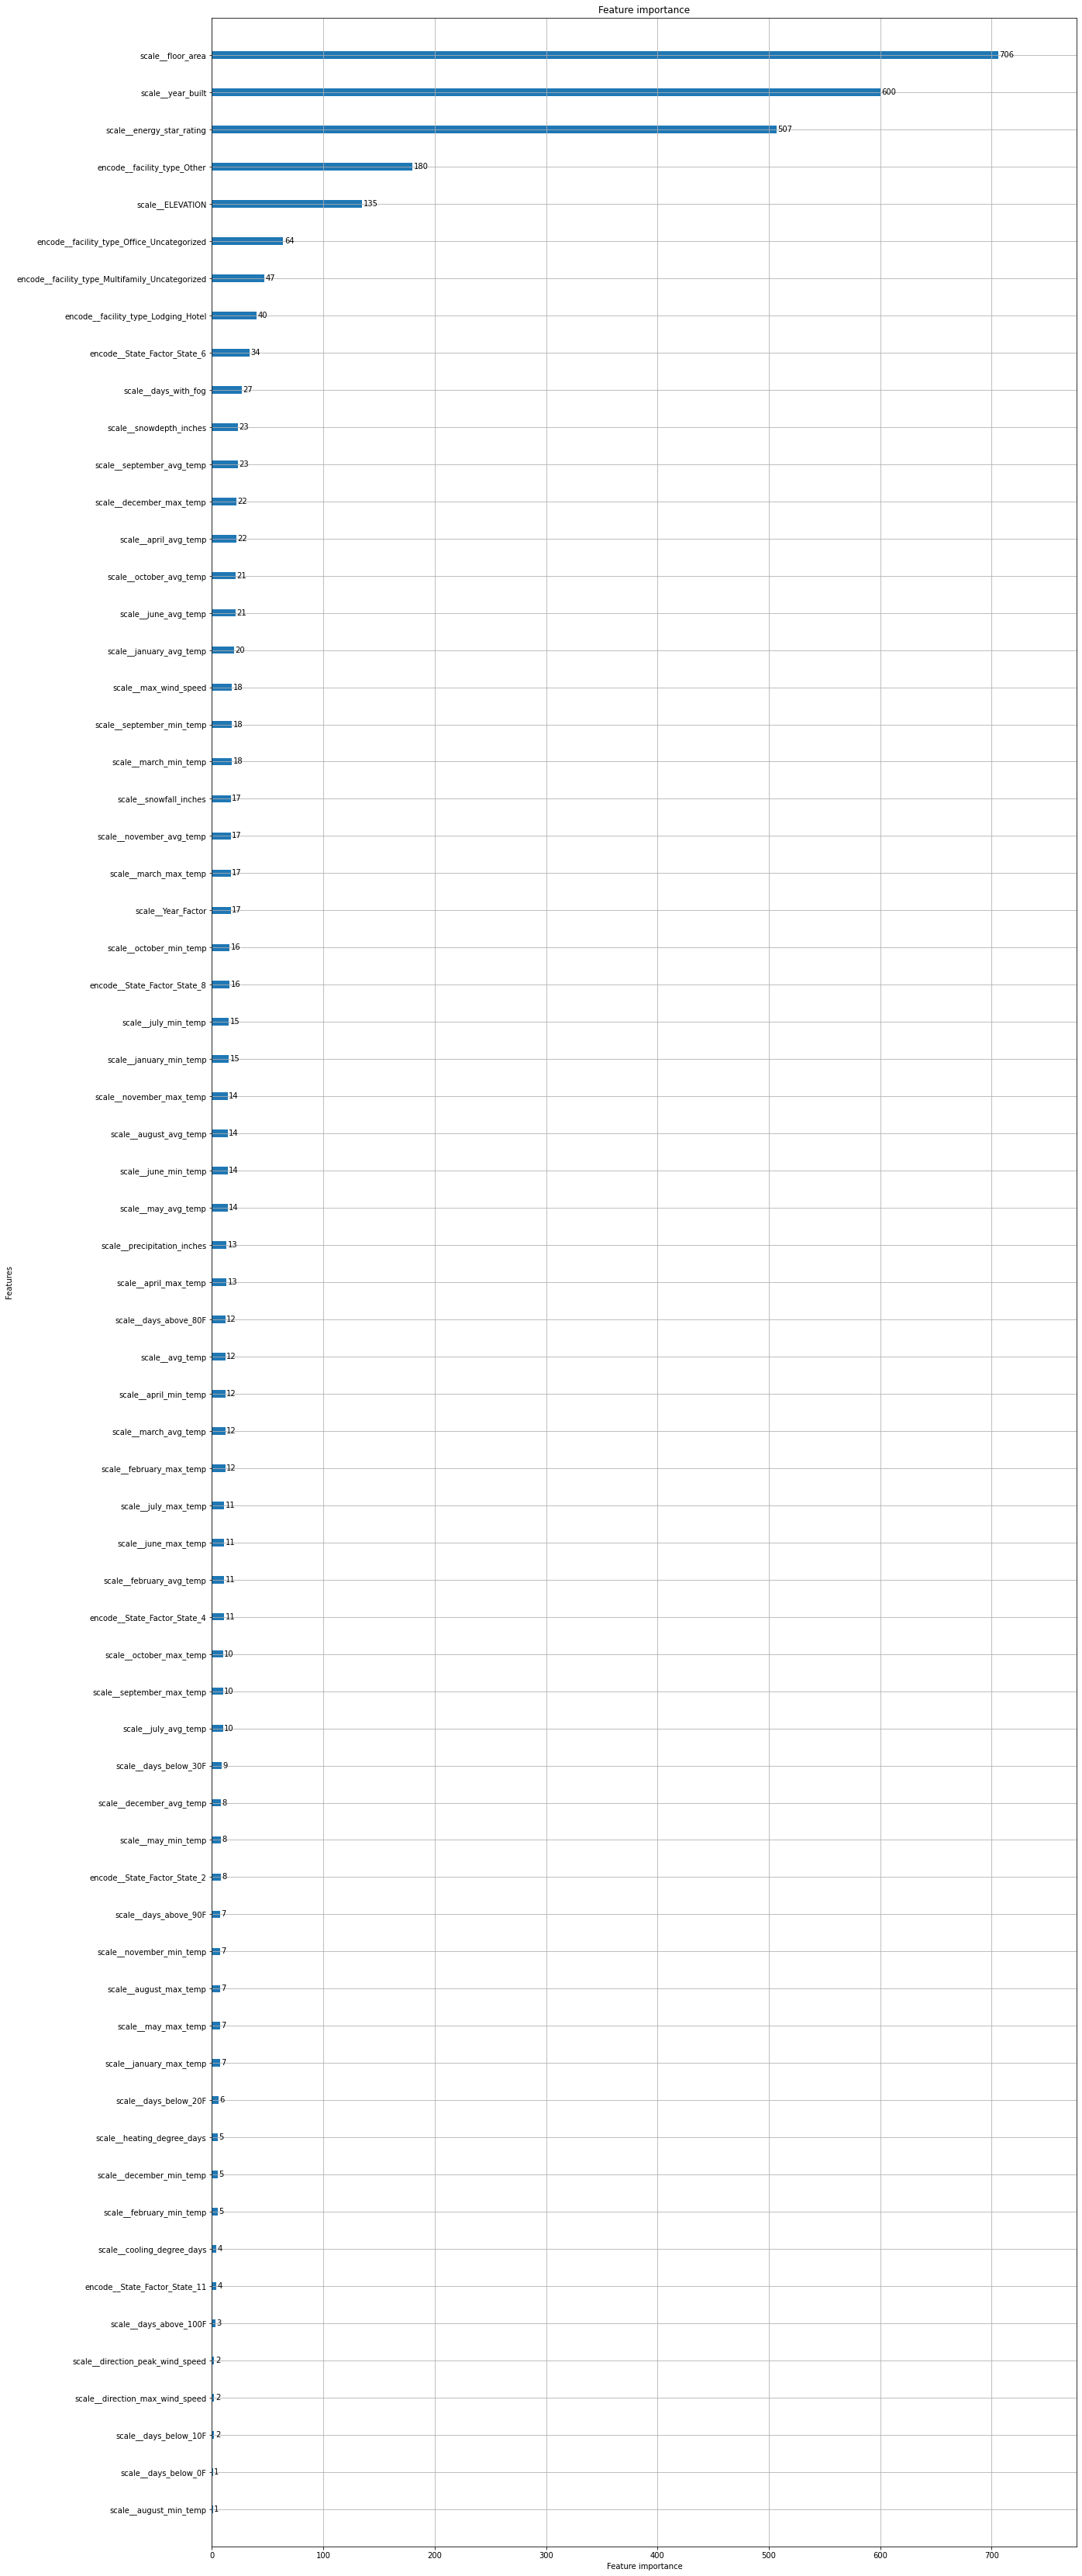

In [12]:
lightgbm.plot_importance(gbm, figsize = (20, 60))
plt.show()

### XGBoost

The ability of ensembles of decision tree methods like gradient boosting to automatically generate estimates of feature relevance from a trained predictive model is a benefit of employing them.

Gradient boosting has the advantage of making retrieving significance scores for each attribute very simple after the boosted trees have been generated.

In general, significance assigns a score to each feature that shows how useful or important it was in the creation of the model's enhanced decision trees. The higher the relative relevance of an attribute, the more it is used to make crucial judgments with decision trees.

This relevance is explicitly estimated for each property in the dataset, allowing attributes to be ordered and contrasted.

The amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for, is used to assess importance for a single decision tree.

The purity (Gini index) used to pick the split points or any more precise error function could be utilised as a performance measure.

The relevance of each attribute is then averaged across all of the decision trees in the model.

In [13]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

[10:16:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


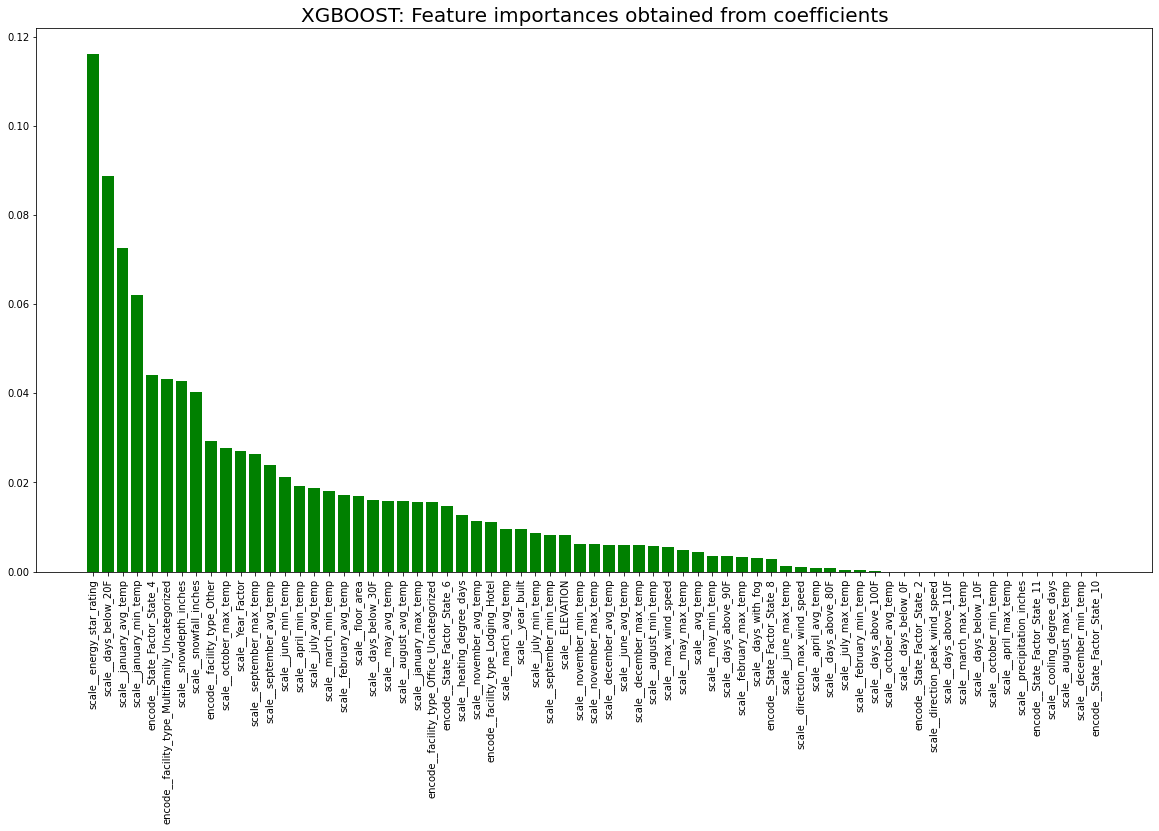

In [14]:
plt.figure(figsize=(20,10))
plt.bar(x=importances["Attribute"], height=importances["Importance"], color="Green")
plt.title("XGBOOST: Feature importances obtained from coefficients", size=20)
plt.xticks(rotation='vertical')
plt.show()

### Principle Component Analysis

Principal Component Analysis (PCA) is an excellent technique for reducing dimensionality and determining feature importance.

PCA, unlike the previous two algorithms, does not display you the most essential features right away. Instead, N primary components will be returned, where N is the number of original features.

Read more about PCA [here.](https://builtin.com/data-science/step-step-explanation-principal-component-analysis) 

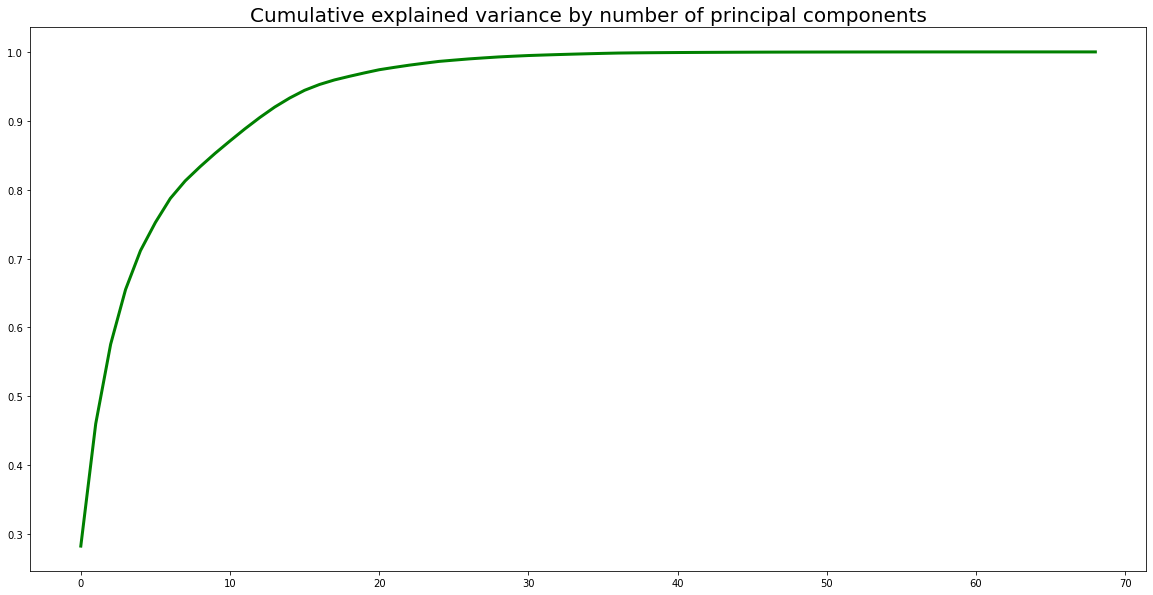

In [31]:
from sklearn.decomposition import PCA

pca = PCA().fit(X) # I haven't fit the training set on this instance. 
plt.figure(figsize=(20,10))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color="Green")
plt.title("Cumulative explained variance by number of principal components", size=20)
plt.show()

The first 12 main components can explain ~90% of the variance in the source dataset. Let's reset the PCA and check these 12 features individually. 

In [32]:
pca = PCA(n_components = 12)
pca.fit(X)

PCA(n_components=12)

In [33]:
pca.explained_variance_ratio_

array([0.28250326, 0.17763518, 0.11538376, 0.07950516, 0.05641492,
       0.04095507, 0.0348674 , 0.02553757, 0.02064194, 0.01925297,
       0.0180513 , 0.01754277])

We can see the PCR1 explains 28% of the dataset, and the first 12 total to 86% of our dataset.  Let's experiment with this! 

In [34]:
x_pca = pca.transform(X)

In [36]:
print(x_pca.shape)

print(X.shape)

(75757, 12)
(75757, 69)


As you can see, we have reduced our original data set from one with 69 features to a more simple model of principal components that has just 12 features.  We could take forward and build a model around the features and test the results.  